In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\Lau_d\Documents\Alexitune\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

In [3]:
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

In [4]:
df = pd.read_csv('datasets\songs_cleaned.csv')
lyrics = df['Lyrics'].tolist()

In [5]:
df['predicted_label'] = ''
df['predicted_probability'] =  0.0

In [6]:
for idx, lyric in enumerate(lyrics):
    try:
        result = classifier(lyric)[0]  
        df.at[idx, 'predicted_label'] = result['label']
        df.at[idx, 'predicted_probability'] = result['score']
    except Exception:
        pass

print(df)


Token indices sequence length is longer than the specified maximum sequence length for this model (627 > 512). Running this sequence through the model will result in indexing errors


      Unnamed: 0.1  Unnamed: 0         ID           Name  \
0                1           1   100276.0      Paperbond   
1                2           2   100465.0      They Know   
2                3           3   100496.0       The Plan   
3                4           4   100618.0      Medicated   
4                5           5   101126.0   Slow Cheetah   
...            ...         ...        ...            ...   
5140          6008        6008    99193.0    We Get High   
5141          6009        6009    99270.0         Beauty   
5142          6010        6010  9954681.0        Selfish   
5143          6011        6011    99610.0  Marble Floors   
5144          6012        6012  9985038.0           HISS   

                     Artist  Artist ID Language  \
0               Wiz Khalifa      310.0       en   
1                Chief Keef    16808.0       en   
2               Wiz Khalifa      310.0       en   
3               Wiz Khalifa      310.0       en   
4     Red Hot Chili Pepp

In [7]:
df.shape

(5145, 10)

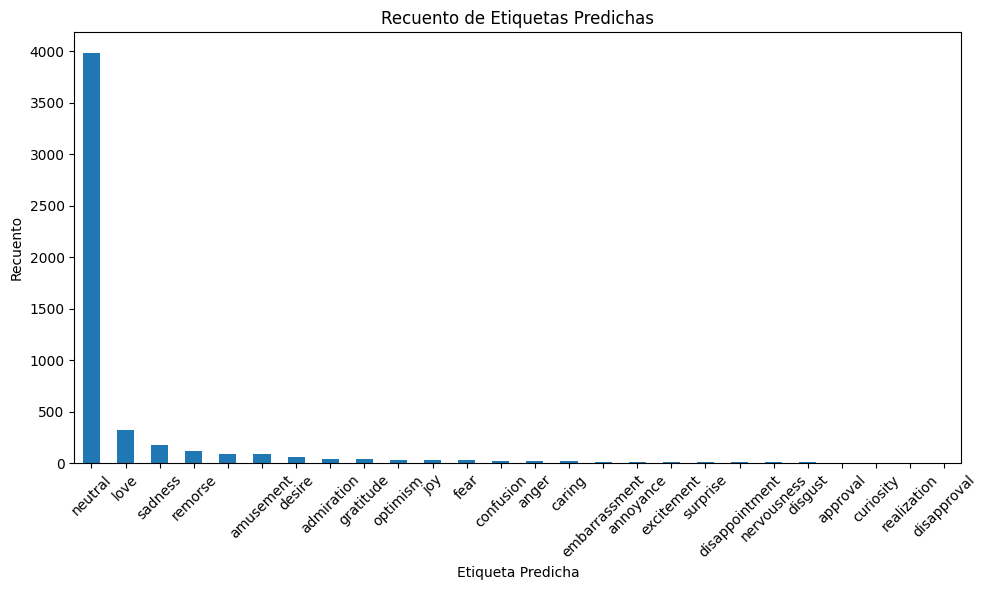

In [8]:
plt.figure(figsize=(10, 6))
df['predicted_label'].value_counts().plot(kind='bar')
plt.title('Recuento de Etiquetas Predichas')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Recuento')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño
plt.show()

In [10]:
emotion_df = df[df['predicted_label'] == 'neutral']
emotion_df.shape

(3984, 10)